Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt


In [2]:
lista_arquivo = []
for arquivo in glob(r"*acidentes*.csv"):
    lista_arquivo.append(arquivo)
print(lista_arquivo)

['acidentes2019_todas_causas_tipos.csv', 'acidentes2020_todas_causas_tipos.csv', 'acidentes2021_todas_causas_tipos.csv', 'acidentes2022_todas_causas_tipos.csv', 'acidentes2023_todas_causas_tipos.csv', 'acidentes2024_todas_causas_tipos.csv']


Carregamento dos dados

In [5]:
tabelas = []
for i in lista_arquivo:
    
    tabelas.append(pd.read_csv(i, encoding = 'ISO-8859-1', sep = ';'))

In [10]:
df = pd.concat(tabelas, axis=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666761 entries, 0 to 443149
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   pesid                   float64
 2   data_inversa            object 
 3   dia_semana              object 
 4   horario                 object 
 5   uf                      object 
 6   br                      float64
 7   km                      object 
 8   municipio               object 
 9   causa_principal         object 
 10  causa_acidente          object 
 11  ordem_tipo_acidente     int64  
 12  tipo_acidente           object 
 13  classificacao_acidente  object 
 14  fase_dia                object 
 15  sentido_via             object 
 16  condicao_metereologica  object 
 17  tipo_pista              object 
 18  tracado_via             object 
 19  uso_solo                object 
 20  id_veiculo              float64
 21  tipo_veiculo            object 
 22  

Tratamento e filtragem dos dados

In [12]:
#Dropando colunas que podem gerar duplicação de ids
drop_colunas = ['br', 'km', 'ordem_tipo_acidente', 'tipo_acidente', 'sentido_via', 'tracado_via', 'marca', 'estado_fisico', 'latitude', 'longitude', 'regional', 'delegacia','uop']
df = df.drop(columns=drop_colunas)

# Lista de siglas dos estados do Nordeste
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
# Filtrar apenas os estados do Nordeste
df = df[df['uf'].isin(estados_nordeste)]

# Filtragem de causas
causa = ['Ingestão de Álcool', 'Ingestão de Substâncias Psicoativas', 'Ingestão de álcool pelo condutor', 
                    'Ingestão de substâncias psicoativas pelo condutor', 'Defeito na via', 'Pista em desnível', 'Acostamento em desnível',
       'Falta de acostamento', 'Demais falhas na via']

df = df[df['causa_acidente'].isin(causa)]

# Lista ingestão de substancias
ingestão_s = ['Ingestão de Álcool', 'Ingestão de Substâncias Psicoativas', 'Ingestão de álcool pelo condutor', 
                    'Ingestão de substâncias psicoativas pelo condutor']

# Substituindo a lista de nomes por um único nome
df['causa_acidente'] = df['causa_acidente'].replace(ingestão_s, 'Ingestão de substancias')

# Lista defeito nas vias
pista = ['Defeito na via', 'Pista em desnível', 'Acostamento em desnível',
       'Falta de acostamento', 'Demais falhas na via']

# Substituindo a lista de nomes por um único nome
df['causa_acidente'] = df['causa_acidente'].replace(pista, 'Defeitos na via/pista')



# Substituir idades maiores que 100 e valores 'NA' por NaN
df['idade'] = df['idade'].apply(lambda x: np.nan if x == 'NA' or (pd.notna(x) and x > 100) else x)

df = df.replace('NA', np.nan)
df = df.dropna()


df = df[df['idade'] >= 18]



#filtrar apenas o condutor
tipo_envolvido = ['Condutor']
df = df[df['tipo_envolvido'].isin(tipo_envolvido)]


# Remover linhas duplicadas
df = df.drop_duplicates().dropna()

# Exibir o resultado final
df


,id,pesid,data_inversa,dia_semana,horario,uf,municipio,causa_principal,causa_acidente,classificacao_acidente,...,tipo_envolvido,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,mes,ano,faixa_etaria
153,182271.0,402536.0,2019-01-01,terça-feira,04:15:00,PB,CATINGUEIRA,Sim,Ingestão de substancias,Com Vítimas Fatais,...,Condutor,22.0,Masculino,0.0,0.0,1.0,0.0,1,2019,18-29
249,182289.0,402431.0,2019-01-01,terça-feira,08:30:00,BA,RIO REAL,Sim,Ingestão de substancias,Com Vítimas Feridas,...,Condutor,43.0,Masculino,1.0,0.0,0.0,0.0,1,2019,40-49
251,182289.0,402243.0,2019-01-01,terça-feira,08:30:00,BA,RIO REAL,Sim,Ingestão de substancias,Com Vítimas Feridas,...,Condutor,30.0,Masculino,0.0,1.0,0.0,0.0,1,2019,30-39
378,182307.0,402638.0,2019-01-01,terça-feira,13:50:00,BA,FEIRA DE SANTANA,Sim,Ingestão de substancias,Com Vítimas Feridas,...,Condutor,57.0,Masculino,0.0,1.0,0.0,0.0,1,2019,50-59
380,182307.0,404046.0,2019-01-01,terça-feira,13:50:00,BA,FEIRA DE SANTANA,Sim,Ingestão de substancias,Com Vítimas Feridas,...,Condutor,33.0,Masculino,1.0,0.0,0.0,0.0,1,2019,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440982,631712.0,1415955.0,2024-09-30,segunda-feira,20:00:00,PI,TERESINA,Sim,Defeitos na via/pista,Com Vítimas Feridas,...,Condutor,30.0,Masculino,0.0,1.0,0.0,0.0,9,2024,30-39
441017,631719.0,1415937.0,2024-09-30,segunda-feira,19:50:00,PE,TRINDADE,Não,Ingestão de substancias,Com Vítimas Feridas,...,Condutor,55.0,Masculino,0.0,0.0,1.0,0.0,9,2024,50-59
441098,631735.0,1415984.0,2024-09-30,segunda-feira,18:20:00,BA,ITAQUARA,Sim,Ingestão de substancias,Com Vítimas Feridas,...,Condutor,48.0,Masculino,0.0,1.0,0.0,0.0,9,2024,40-49
441135,631746.0,1416014.0,2024-09-30,segunda-feira,23:00:00,AL,AGUA BRANCA,Não,Defeitos na via/pista,Com Vítimas Fatais,...,Condutor,63.0,Masculino,0.0,0.0,0.0,1.0,9,2024,60-69


In [15]:
#agrupando as caudas por municipio e transformando os municipios em colunas
causa_acidentes_x_municipio = pd.crosstab(df['causa_acidente'], df['municipio'])

In [16]:
causa_acidentes_x_municipio  

municipio,ABARE,ABREU E LIMA,ACAILANDIA,ACARAU,ACARI,ACAUA,ACU,AFRANIO,AGRESTINA,AGRICOLANDIA,...,VENTUROSA,VERDEJANTE,VILA NOVA DO PIAUI,VITORIA DA CONQUISTA,VITORIA DE SANTO ANTAO,VITORIA DO MEARIM,WANDERLEY,WENCESLAU GUIMARAES,XEXEU,ZE DOCA
causa_acidente,,,,,,,,,,,,,,,,,,,,,
Defeitos na via/pista,5,6,5,0,0,0,0,0,3,0,...,8,1,0,12,1,0,2,0,1,0
Ingestão de substancias,5,35,152,3,5,2,19,6,38,2,...,12,7,5,252,6,9,0,12,4,6


In [17]:
#dataframe com casa como coluna e não index 
causa_acidentes_x_municipio_df = causa_acidentes_x_municipio.reset_index()
causa_acidentes_x_municipio_df

municipio,causa_acidente,ABARE,ABREU E LIMA,ACAILANDIA,ACARAU,ACARI,ACAUA,ACU,AFRANIO,AGRESTINA,...,VENTUROSA,VERDEJANTE,VILA NOVA DO PIAUI,VITORIA DA CONQUISTA,VITORIA DE SANTO ANTAO,VITORIA DO MEARIM,WANDERLEY,WENCESLAU GUIMARAES,XEXEU,ZE DOCA
0,Defeitos na via/pista,5,6,5,0,0,0,0,0,3,...,8,1,0,12,1,0,2,0,1,0
1,Ingestão de substancias,5,35,152,3,5,2,19,6,38,...,12,7,5,252,6,9,0,12,4,6


In [232]:
causa_acidentes_x_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 630 entries, causa_acidente to ZE DOCA
dtypes: int64(629), object(1)
memory usage: 10.0+ KB


In [18]:
#transpondo a tabela para as causas ficarem nas colunas no lugar dos municipios
causa_acidentes_x_regiao_t = causa_acidentes_x_municipio.T

In [19]:
causa_acidentes_x_regiao_t

causa_acidente,Defeitos na via/pista,Ingestão de substancias
municipio,,
ABARE,5,5
ABREU E LIMA,6,35
ACAILANDIA,5,152
ACARAU,0,3
ACARI,0,5
...,...,...
VITORIA DO MEARIM,0,9
WANDERLEY,2,0
WENCESLAU GUIMARAES,0,12


In [20]:
W = causa_acidentes_x_regiao_t

Análise estátistica

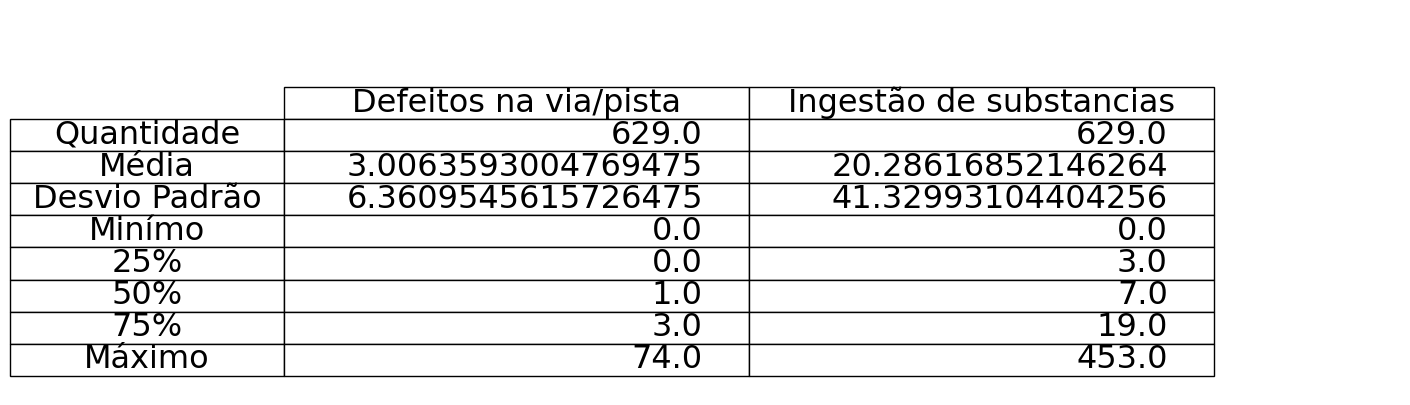

In [21]:
fig, ax = plt.subplots(figsize=(16, 5))


summary = pd.DataFrame(W.describe()).T
summary.columns = ['Quantidade', 'Média', 'Desvio Padrão', 'Minímo','25%','50%','75%', 'Máximo']
summary = summary.T

table = plt.table(cellText=summary.values,
          rowLabels=summary.index,
          colLabels=summary.columns,
          cellLoc = 'right', rowLoc = 'center',
          loc='right', bbox=[.1,.05,.75,.75])

plt.axis('off')

table.set_fontsize(50)
table.scale(50, 50)  # may help

Método do cotovelo

In [22]:
data = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(W)
    data.append(kmeans.inertia_)
    print(f'Nº Clusters {k}: Inércia {kmeans.inertia_}')

Nº Clusters 1: Inércia 1098136.4642289346
Nº Clusters 2: Inércia 332823.02685291483
Nº Clusters 3: Inércia 194107.27908953803
Nº Clusters 4: Inércia 112914.62607573156
Nº Clusters 5: Inércia 73572.48274965424
Nº Clusters 6: Inércia 54380.59456629868
Nº Clusters 7: Inércia 41616.50763392175
Nº Clusters 8: Inércia 38226.486592911235
Nº Clusters 9: Inércia 29577.18103735569
Nº Clusters 10: Inércia 26930.957823069977
Nº Clusters 11: Inércia 21315.178792141705
Nº Clusters 12: Inércia 18615.446582120763
Nº Clusters 13: Inércia 16174.460867835049
Nº Clusters 14: Inércia 13638.076114827412


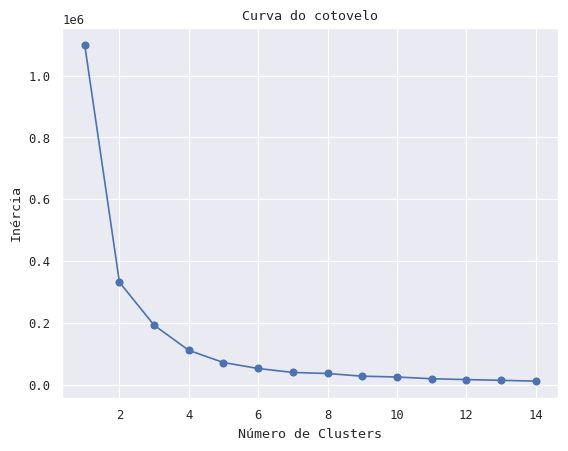

In [341]:
# Curva do Cotovelo
plt.plot(range(1,15), data, marker='o')
plt.title("Curva do cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

Índice de silhueta

In [23]:
from sklearn.metrics import silhouette_score
data2 = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(W)
    score = silhouette_score(W, kmeans.labels_)
    data2.append(score)
    print(f'Nº Clusters {k}: Silhueta {score:.2f}')



Nº Clusters 2: Silhueta 0.88
Nº Clusters 3: Silhueta 0.77
Nº Clusters 4: Silhueta 0.71
Nº Clusters 5: Silhueta 0.70
Nº Clusters 6: Silhueta 0.69
Nº Clusters 7: Silhueta 0.56
Nº Clusters 8: Silhueta 0.61
Nº Clusters 9: Silhueta 0.61
Nº Clusters 10: Silhueta 0.61
Nº Clusters 11: Silhueta 0.53
Nº Clusters 12: Silhueta 0.47
Nº Clusters 13: Silhueta 0.47
Nº Clusters 14: Silhueta 0.49


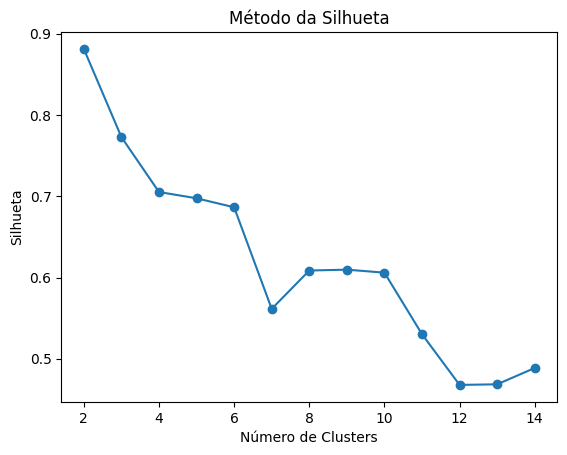

In [24]:
plt.plot(range(2,15), data2, marker='o')
plt.title("Método da Silhueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhueta")
plt.show()

Davies-Bouldin Index 

In [25]:
from sklearn.metrics import davies_bouldin_score

data3 = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(W)
    score = davies_bouldin_score(W, kmeans.labels_)
    data3.append(score)
    print(f'Nº Clusters {k}: DB {score:.3f}')

Nº Clusters 2: DB 0.428
Nº Clusters 3: DB 0.538
Nº Clusters 4: DB 0.535
Nº Clusters 5: DB 0.434
Nº Clusters 6: DB 0.498
Nº Clusters 7: DB 0.570
Nº Clusters 8: DB 0.499
Nº Clusters 9: DB 0.489
Nº Clusters 10: DB 0.524
Nº Clusters 11: DB 0.554
Nº Clusters 12: DB 0.598
Nº Clusters 13: DB 0.567
Nº Clusters 14: DB 0.548


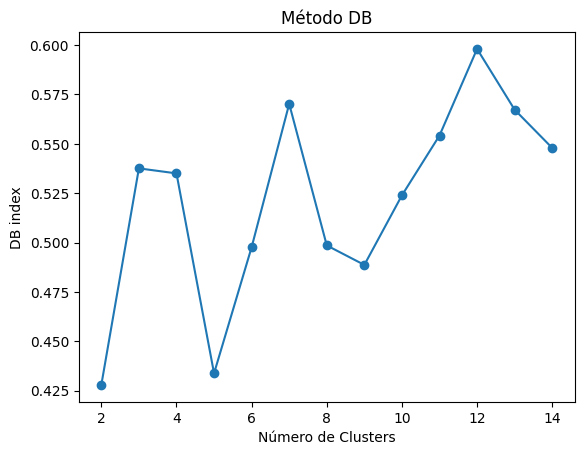

In [26]:
# Curva DB
plt.plot(range(2,15), data3, marker='o')
plt.title("Método DB")
plt.xlabel("Número de Clusters")
plt.ylabel("DB index")
plt.show()

Calinski-Harabasz Index

In [27]:
from sklearn.metrics import calinski_harabasz_score

data4 = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(W)
    score = calinski_harabasz_score(W, kmeans.labels_)
    data4.append(score)
    print(f'Nº Clusters {k}: CH {score:.3f}')

Nº Clusters 2: CH 1441.762
Nº Clusters 3: CH 1457.756
Nº Clusters 4: CH 1817.785
Nº Clusters 5: CH 2172.442
Nº Clusters 6: CH 2391.633
Nº Clusters 7: CH 2631.790
Nº Clusters 8: CH 2459.791
Nº Clusters 9: CH 2799.907
Nº Clusters 10: CH 2735.704
Nº Clusters 11: CH 3123.115
Nº Clusters 12: CH 3254.006
Nº Clusters 13: CH 3435.381
Nº Clusters 14: CH 3761.903


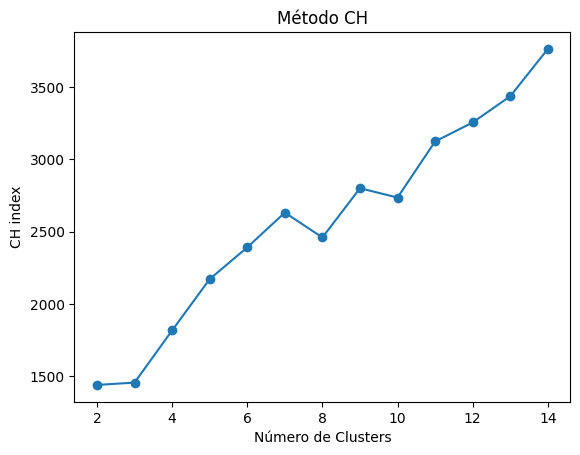

In [28]:
# Curva CH
plt.plot(range(2,15), data4, marker='o')
plt.title("Método CH")
plt.xlabel("Número de Clusters")
plt.ylabel("CH index")
plt.show()

K-means

In [29]:
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_id = kmeans.fit_predict(W)

In [30]:
#inserindo no dataframe
W['cluster_id'] = cluster_id

In [31]:
W

causa_acidente,Defeitos na via/pista,Ingestão de substancias,cluster_id
municipio,,,
ABARE,5,5,0
ABREU E LIMA,6,35,0
ACAILANDIA,5,152,2
ACARAU,0,3,0
ACARI,0,5,0
...,...,...,...
VITORIA DO MEARIM,0,9,0
WANDERLEY,2,0,0
WENCESLAU GUIMARAES,0,12,0


In [40]:
clusters = W.reset_index()
clusters.index.name = None
clusters

causa_acidente,municipio,Defeitos na via/pista,Ingestão de substancias,cluster_id
0,ABARE,5,5,0
1,ABREU E LIMA,6,35,0
2,ACAILANDIA,5,152,2
3,ACARAU,0,3,0
4,ACARI,0,5,0
...,...,...,...,...
624,VITORIA DO MEARIM,0,9,0
625,WANDERLEY,2,0,0
626,WENCESLAU GUIMARAES,0,12,0
627,XEXEU,1,4,0


Função para resumo dos clusters

In [35]:
#função para resumo dos clusters
def describe_cluster(variavel, cluster_id):
    
    for x in range(0, cluster_id):
        
        
        font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 22}

        plt.rc('font', **font)
    
        fig, ax = plt.subplots(figsize=(26, 10))

        plt.subplot(1, 2, 1)

        summary = pd.DataFrame(variavel[variavel['cluster_id'] == x].describe()).T
        summary.columns = ['Quantidade', 'Média', 'Desvio Padrão', 'Minímo','25%','50%','75%', 'Máximo']
        summary = summary.T

        table = plt.table(cellText=summary.values,
                  rowLabels=summary.index,
                  colLabels=summary.columns,
                              cellLoc = 'right', rowLoc = 'center',
          loc='right', bbox=[.1,.05,1.3,.95])

        plt.axis('off')

        plt.title("Descrição do Cluster " + str(x) + " - Quantidade de Acidentes ")
        table.set_fontsize(22)
        table.scale(3, 3)  
        
        plt.subplot(1, 2, 2)
        plt.title("Amostra dos Municípios do Cluster " + str(x))
        quantidade = variavel[variavel['cluster_id'] == x]['cluster_id'].count()
        if  quantidade < 10:
            sample = variavel[variavel['cluster_id'] == x].sample(quantidade).index
        else: 
            sample = variavel[variavel['cluster_id'] == x].sample(10).index
            
        table = plt.table(cellText=pd.DataFrame(sample).values,
                          cellLoc = 'right', rowLoc = 'center',
          loc='top',
                          bbox=[.25,.55,.45,.45])

        plt.axis('off')

Análise de Clusters

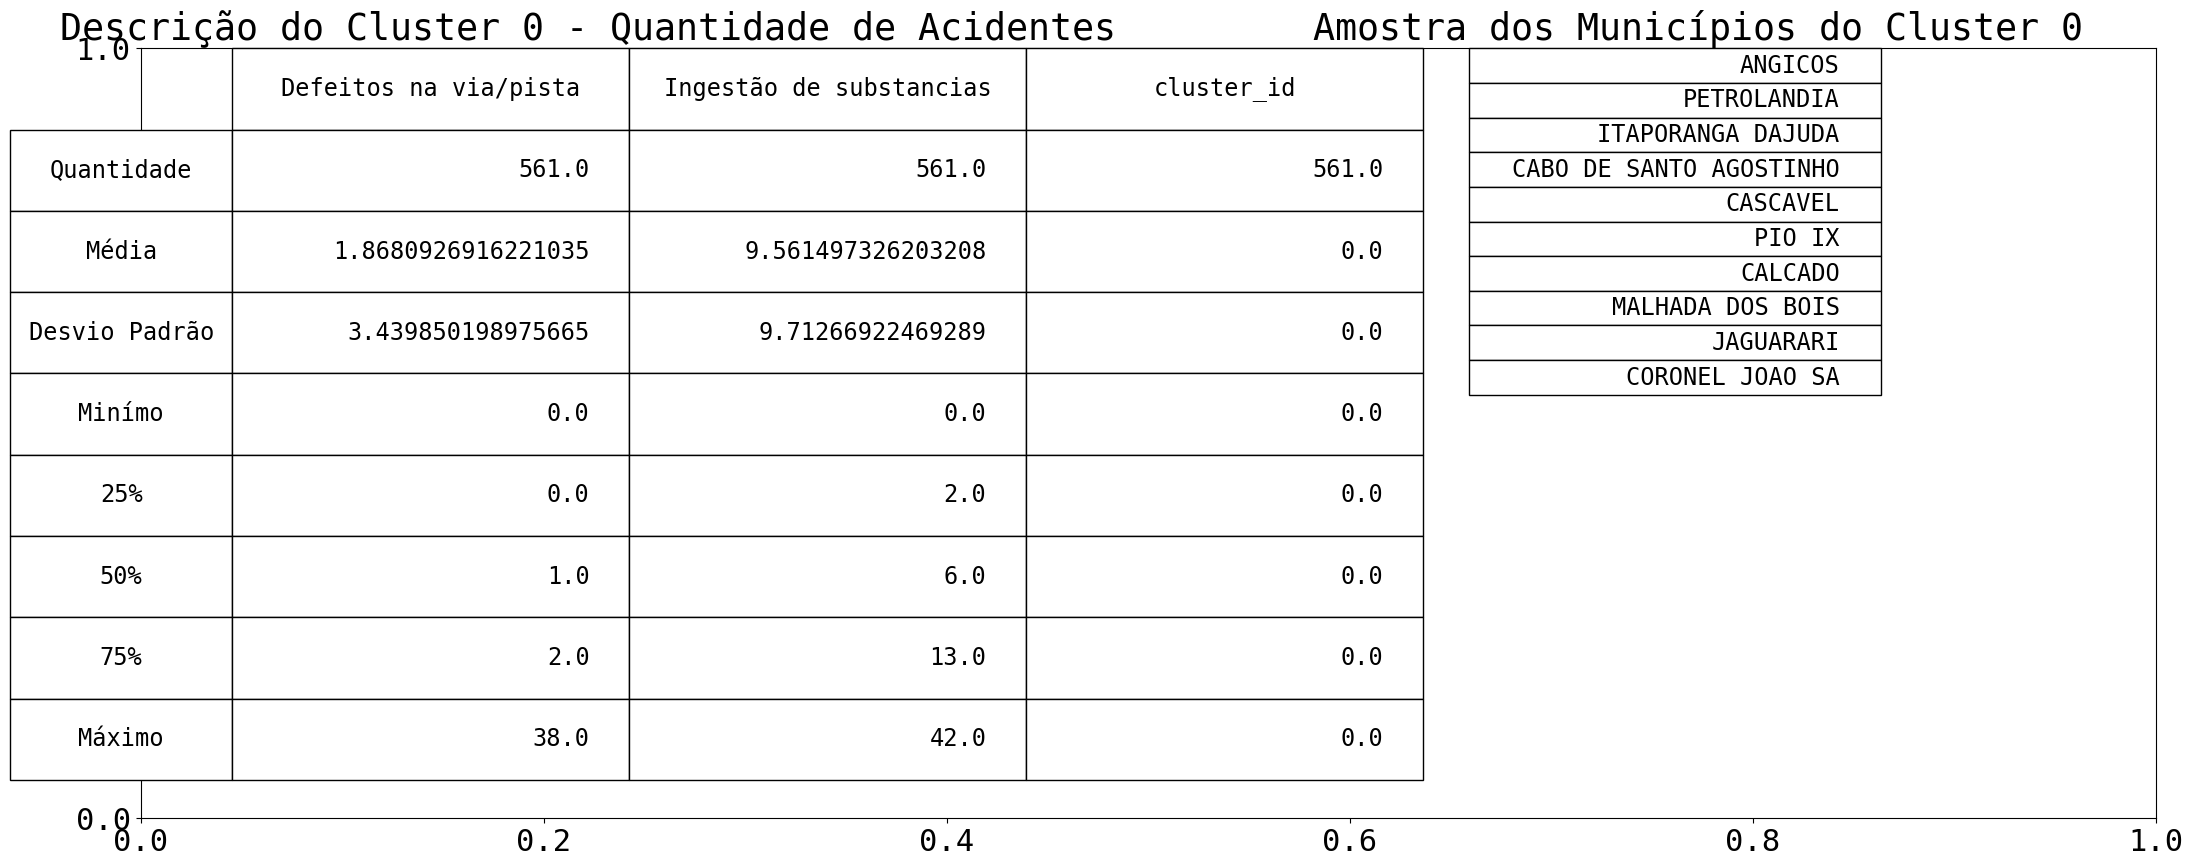

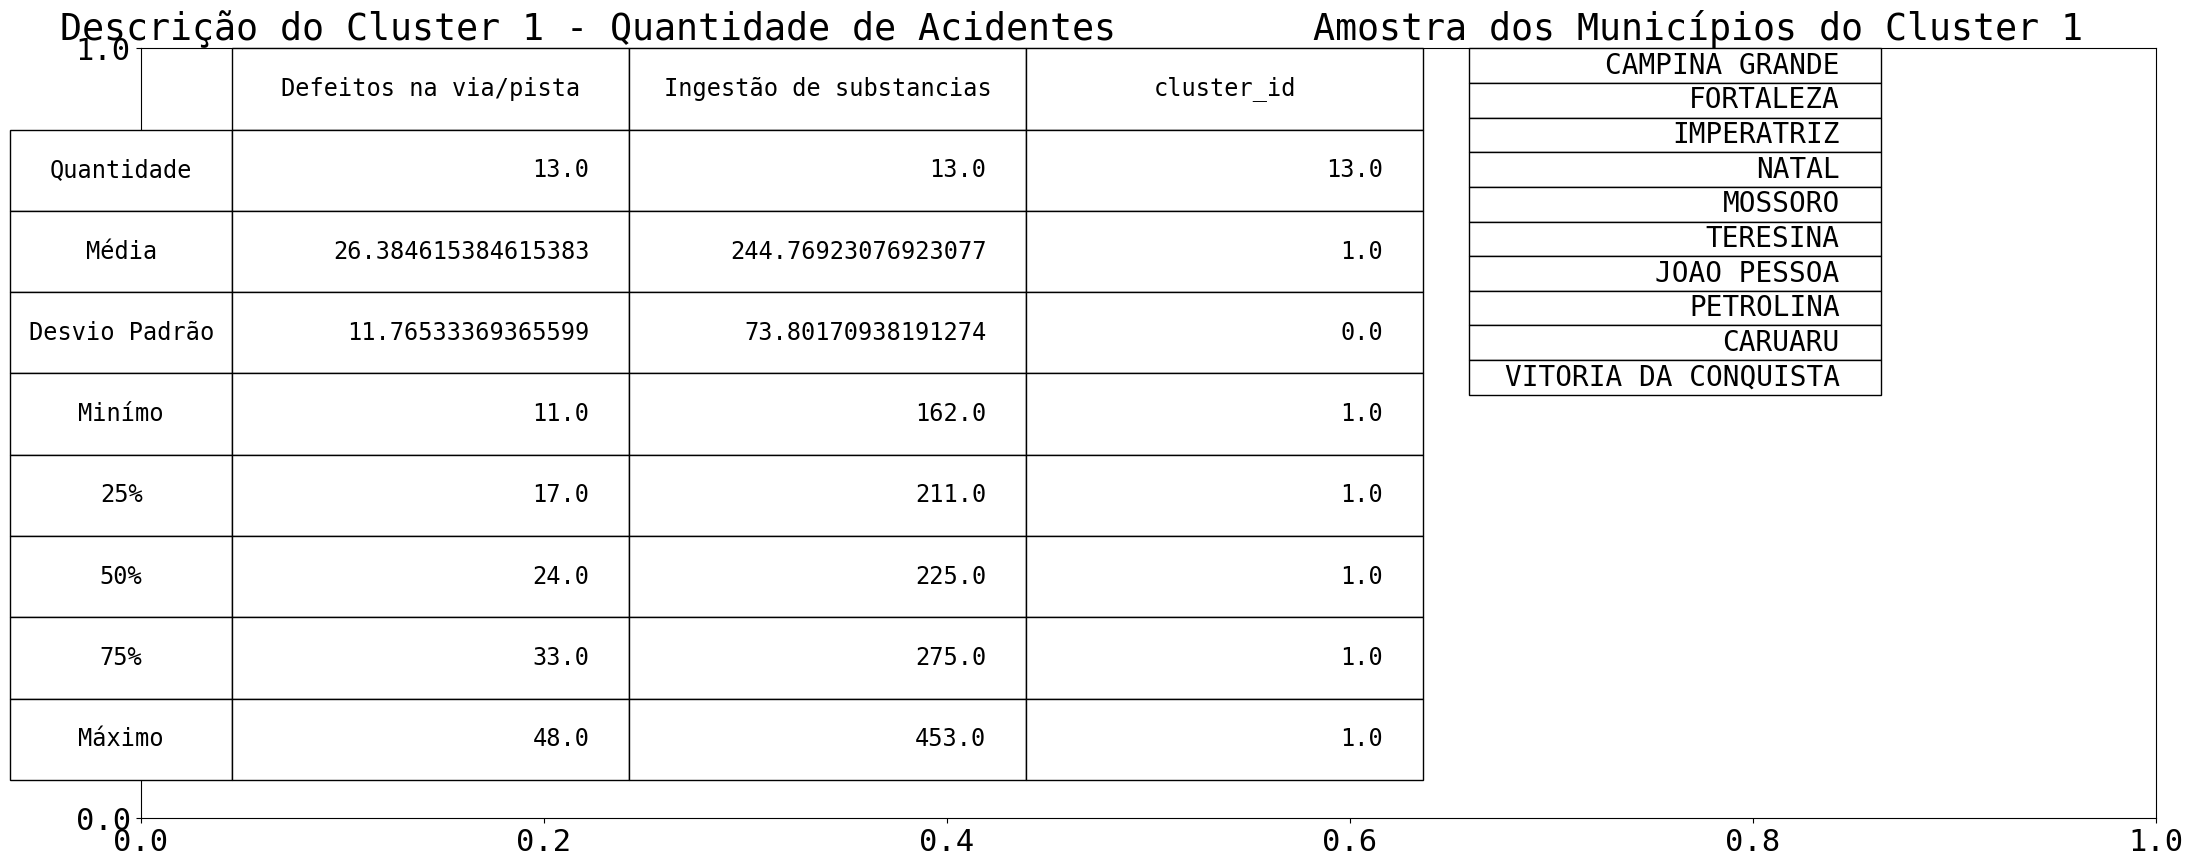

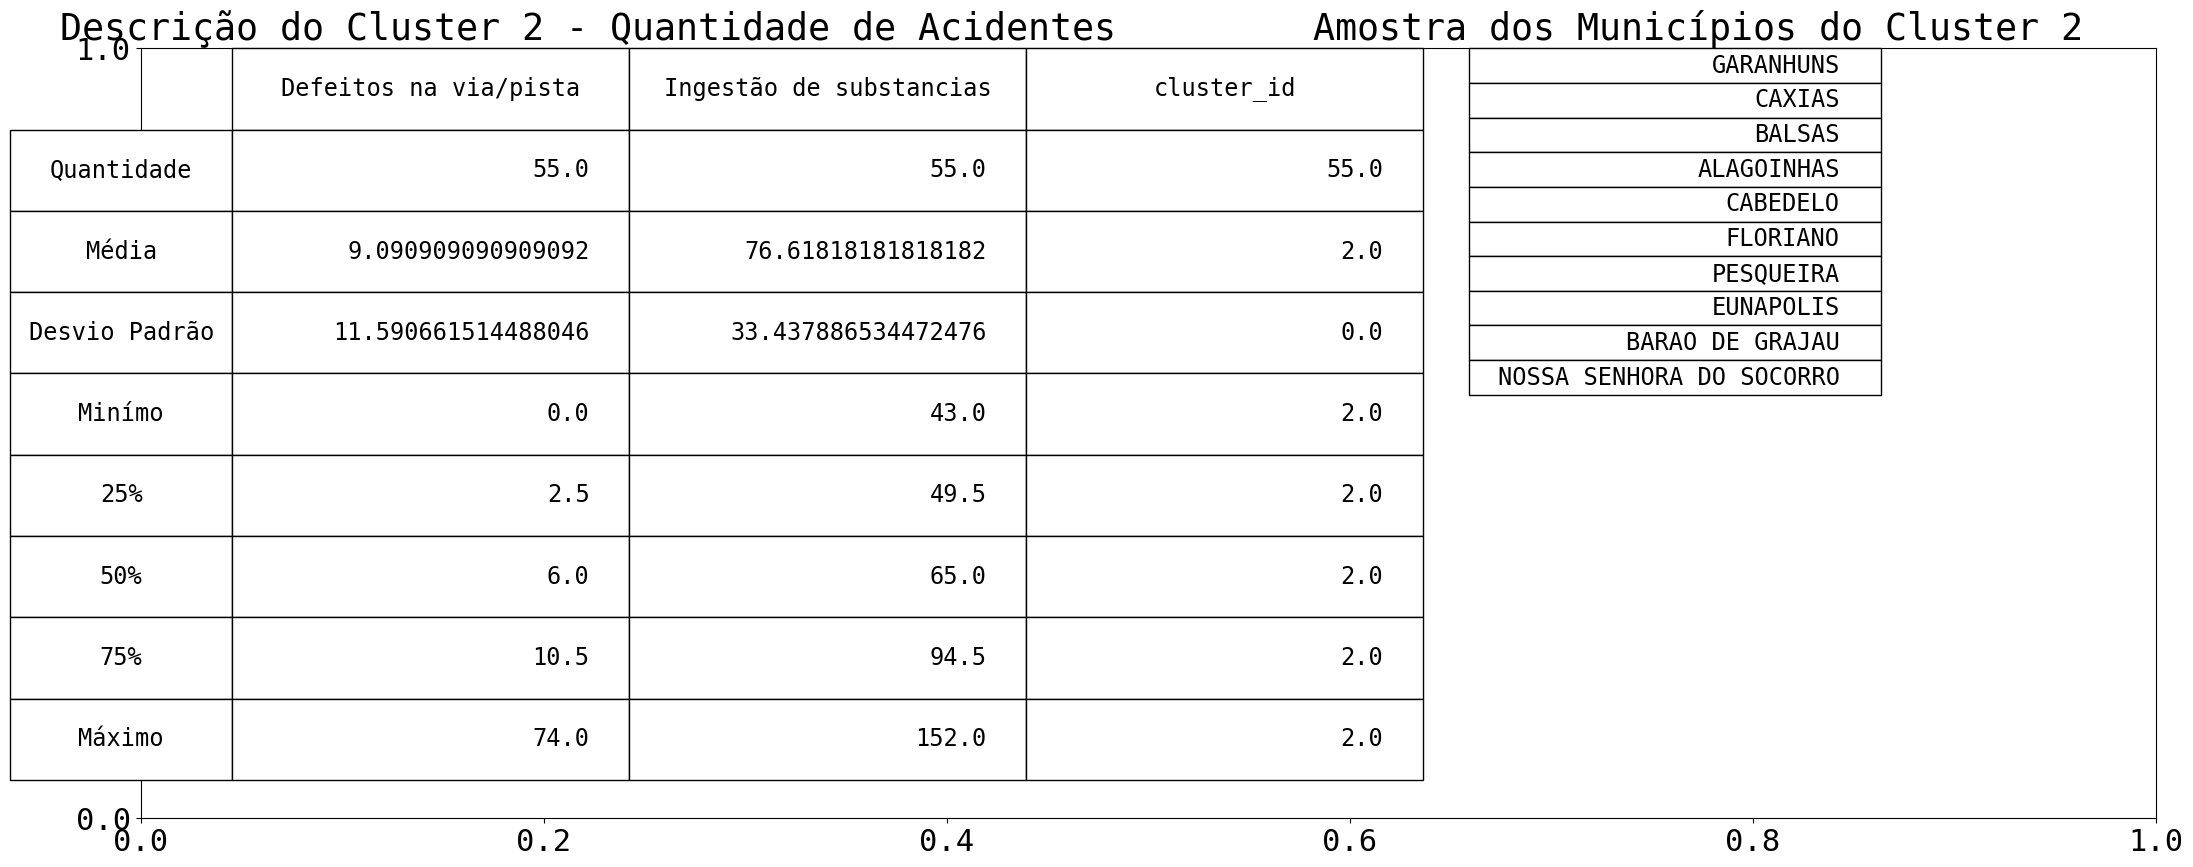

In [36]:
describe_cluster(W, 3)

Plotando os agrupamentos e os centroídes

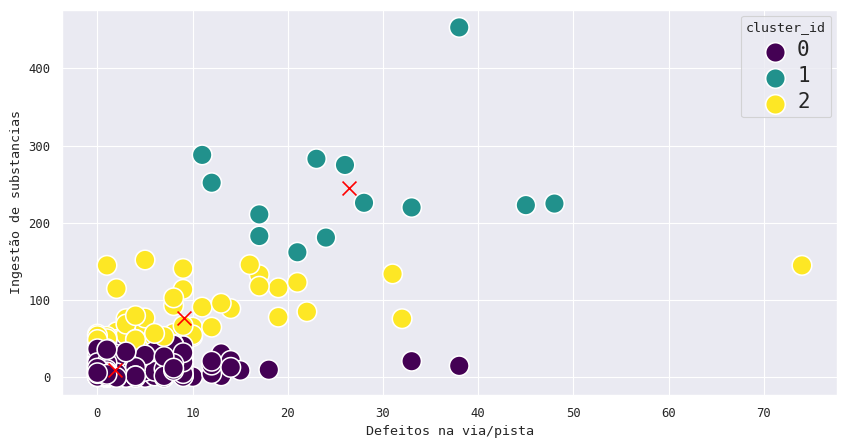

In [411]:
# Plotando os agrupamentos e os centroídes
fig, ax = plt.subplots(figsize=(10, 5))



sns.scatterplot(x="Defeitos na via/pista", y="Ingestão de substancias", hue="cluster_id", data=W, s=200, palette="viridis")
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text



ax.scatter(kmeans.cluster_centers_[:,0] ,
           kmeans.cluster_centers_[:,1], 
           color='red', 
           marker="x", s=100)


#text = [ax.text(x, y, t) for x, y, t in zip(W.values[:,0], 
#                                            W.values[:,1], 
#                                            W.values[:,2])]



plt.xlabel('Defeitos na via/pista')
plt.ylabel('Ingestão de substancias')
plt.show()

In [41]:
df_uf = df[['uf', 'municipio']].drop_duplicates()
df_merged = clusters.merge(df_uf, on='municipio', how='left')
df_merged = df_merged[['uf', 'municipio', 'Defeitos na via/pista', 'Ingestão de substancias', "cluster_id"]]

In [ ]:
df_merged.to_excel('acidentes_causas.xlsx')